# Multiarmed bandit visual of convergence

In [1]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from multi_armed_bandit import epsilon_greedy, k_armed_bandit_problem, incremental_epsilon_greedy, upper_confidence_bound_action_selection

In [3]:
NUM_TRAILS = 2000
NUM_STEPS = 1000
take_action = k_armed_bandit_problem(10)

# epsilon-greedy Comparison of different epsilon values on the 10-armed testbed

In [4]:
reward_01 = np.array([epsilon_greedy(k=10, epsilon=0.1, n_steps=NUM_STEPS, take_action=take_action) for run in range(NUM_TRAILS)])
reward_001 = np.array([epsilon_greedy(k=10, epsilon=0.01, n_steps=NUM_STEPS, take_action=take_action) for run in range(NUM_TRAILS)])
reward_0 = np.array([epsilon_greedy(k=10, epsilon=0, n_steps=NUM_STEPS, take_action=take_action) for run in range(NUM_TRAILS)])

In [5]:
assert(reward_01.shape == (NUM_TRAILS, NUM_STEPS))

Text(0.5, 1.0, 'epsilon greedy comparsion on 10-armed testbed')

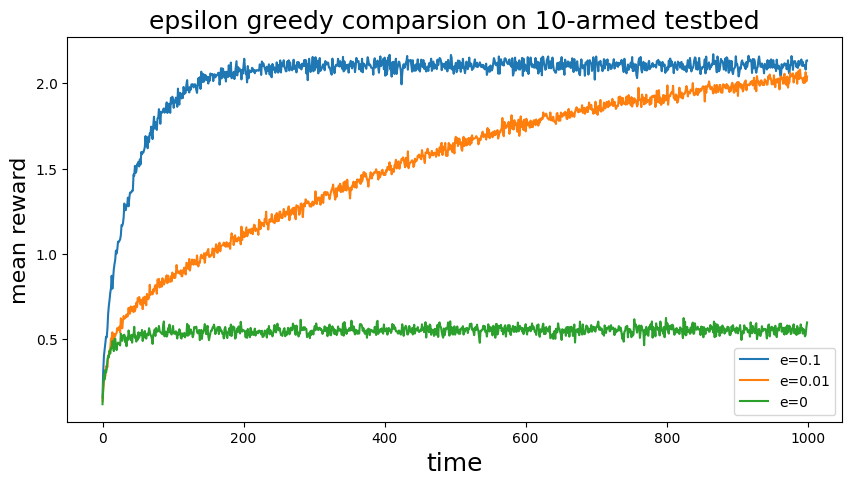

In [6]:
fig, axs = plt.subplots(1,1, figsize=(10,5))
axs.plot(np.arange(NUM_STEPS), np.mean(reward_01, axis=0), label="e=0.1")
axs.plot(np.arange(NUM_STEPS), np.mean(reward_001, axis=0), label="e=0.01")
axs.plot(np.arange(NUM_STEPS), np.mean(reward_0, axis=0), label="e=0")
plt.legend()
plt.xlabel('time', fontsize=18)
plt.ylabel('mean reward', fontsize=16)
plt.title('epsilon greedy comparsion on 10-armed testbed', fontsize=18)

# incremental epsilon-greedy Comparison of different epsilon values on the 10-armed testbed

In [7]:
reward_01 = np.array([incremental_epsilon_greedy(k=10, epsilon=0.1, n_steps=NUM_STEPS, take_action=take_action) for run in range(NUM_TRAILS)])
reward_001 = np.array([incremental_epsilon_greedy(k=10, epsilon=0.01, n_steps=NUM_STEPS, take_action=take_action) for run in range(NUM_TRAILS)])
reward_0 = np.array([incremental_epsilon_greedy(k=10, epsilon=0, n_steps=NUM_STEPS, take_action=take_action) for run in range(NUM_TRAILS)])

Text(0.5, 1.0, 'incremental epsilon greedy comparsion on 10-armed testbed')

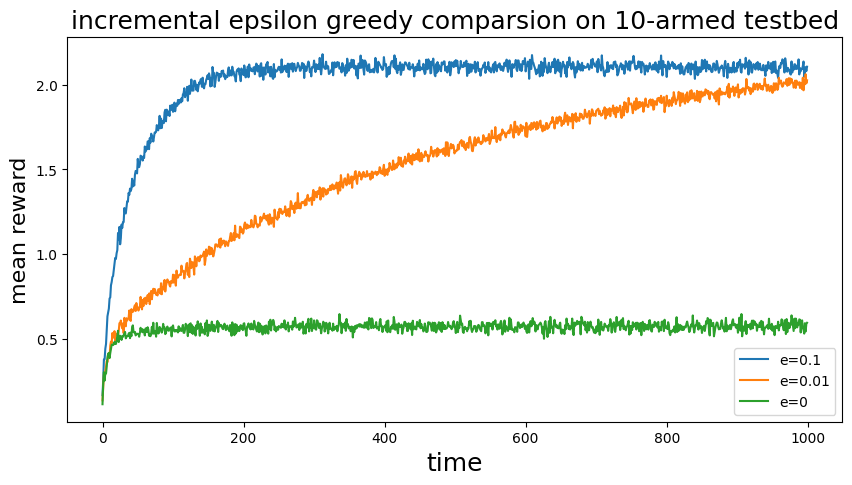

In [8]:
fig, axs = plt.subplots(1,1, figsize=(10,5))
axs.plot(np.arange(NUM_STEPS), np.mean(reward_01, axis=0), label="e=0.1")
axs.plot(np.arange(NUM_STEPS), np.mean(reward_001, axis=0), label="e=0.01")
axs.plot(np.arange(NUM_STEPS), np.mean(reward_0, axis=0), label="e=0")
plt.legend()
plt.xlabel('time', fontsize=18)
plt.ylabel('mean reward', fontsize=16)
plt.title('incremental epsilon greedy comparsion on 10-armed testbed', fontsize=18)

# upper confidence bound action selection comparison over different c values on 10-armed test bed 

In [9]:
reward_1 = np.array([upper_confidence_bound_action_selection(k=10, c=1, n_steps=NUM_STEPS, take_action=take_action) for run in range(NUM_TRAILS)])
reward_2 = np.array([upper_confidence_bound_action_selection(k=10, c=2, n_steps=NUM_STEPS, take_action=take_action) for run in range(NUM_TRAILS)])
reward_3 = np.array([upper_confidence_bound_action_selection(k=10, c=3, n_steps=NUM_STEPS, take_action=take_action) for run in range(NUM_TRAILS)])

/home/fergus/repos/reinforcement-learning/multi_armed_bandit.py:126: RuntimeWarning: invalid value encountered in divide
  next_action = np.argmax(Q + c * np.sqrt(np.log(i + 1) / Q_selected_count))
/home/fergus/repos/reinforcement-learning/multi_armed_bandit.py:126: RuntimeWarning: divide by zero encountered in divide
  next_action = np.argmax(Q + c * np.sqrt(np.log(i + 1) / Q_selected_count))


Text(0.5, 1.0, 'UCB action selection comparsion on 10-armed testbed')

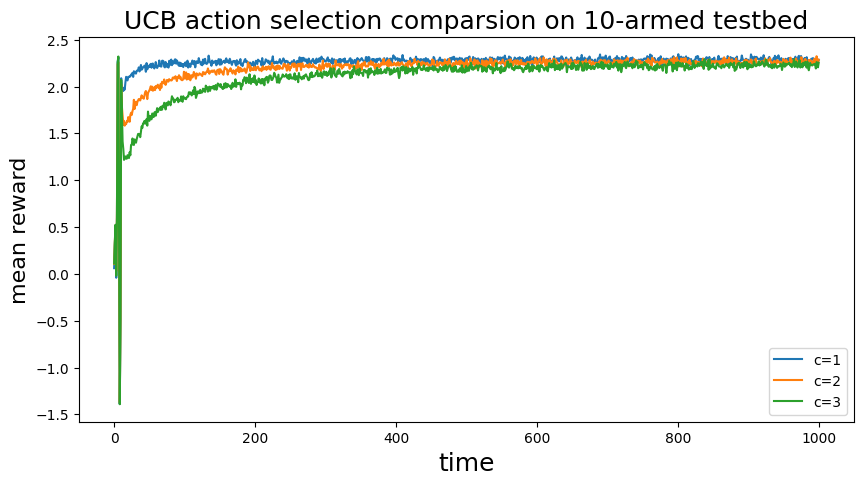

In [10]:
fig, axs = plt.subplots(1,1, figsize=(10,5))
axs.plot(np.arange(NUM_STEPS), np.mean(reward_1, axis=0), label="c=1")
axs.plot(np.arange(NUM_STEPS), np.mean(reward_2, axis=0), label="c=2")
axs.plot(np.arange(NUM_STEPS), np.mean(reward_3, axis=0), label="c=3")
plt.legend()
plt.xlabel('time', fontsize=18)
plt.ylabel('mean reward', fontsize=16)
plt.title('UCB action selection comparsion on 10-armed testbed', fontsize=18)

# Gradient bandit algorithms 

In [12]:
from multi_armed_bandit import incremental_gradient_bandit

reward_1 = np.array([incremental_gradient_bandit(k=10, alpha=0.1, n_steps=NUM_STEPS, take_action=take_action) for run in range(NUM_TRAILS)])
reward_2 = np.array([incremental_gradient_bandit(k=10, alpha=0.4, n_steps=NUM_STEPS, take_action=take_action) for run in range(NUM_TRAILS)])
reward_3 = np.array([incremental_gradient_bandit(k=10, alpha=0.8, n_steps=NUM_STEPS, take_action=take_action) for run in range(NUM_TRAILS)])

Larger step size will make it update towards most recent value faster. This makes sense for a stochastic bandit

Text(0.5, 1.0, 'gradient bandit comparsion with different step sizes on 10-armed testbed')

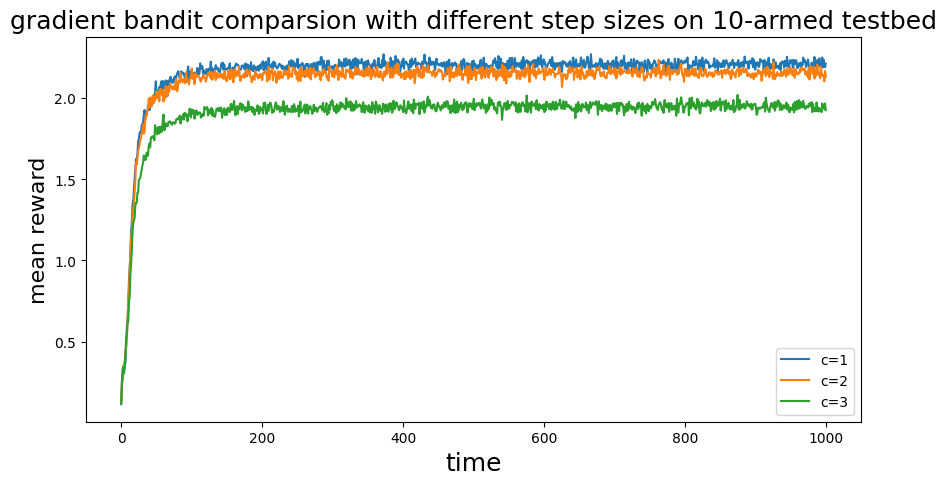

In [13]:
fig, axs = plt.subplots(1,1, figsize=(10,5))
axs.plot(np.arange(NUM_STEPS), np.mean(reward_1, axis=0), label="c=1")
axs.plot(np.arange(NUM_STEPS), np.mean(reward_2, axis=0), label="c=2")
axs.plot(np.arange(NUM_STEPS), np.mean(reward_3, axis=0), label="c=3")
plt.legend()
plt.xlabel('time', fontsize=18)
plt.ylabel('mean reward', fontsize=16)
plt.title('gradient bandit comparsion with different step sizes on 10-armed testbed', fontsize=18)